In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from util.helpers import id2label, labels


In [12]:
df = pd.read_csv('../../dataset/nou_hearings.csv')
df

,actor,text,date,label
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,0
1,Abelia,Innledningsvis vil vi takke for det grundige o...,30.01.2024,0
2,Abelia,Vi er enig med utvalget i at klimapolitikken m...,30.01.2024,0
3,Abelia,Over de siste åtte årene har Abelia målt norsk...,30.01.2024,0
4,Abelia,Vi vil gjerne oppfordre til at det blir satt s...,30.01.2024,0
...,...,...,...,...
3043,ZERO,Zero støtter utvalgets syn på viktigheten av å...,23.02.2024,5
3044,ZERO,Det finnes også andre måter å minimere eller e...,23.02.2024,5
3045,ZERO,Samtidig er det viktig å både holde fast på kl...,23.02.2024,5
3046,ZERO,Alle prosjekter som skal inn i NTP må kunne re...,23.02.2024,5


In [13]:
df["label"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [14]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [15]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))


0.34911582907820476


<Axes: >

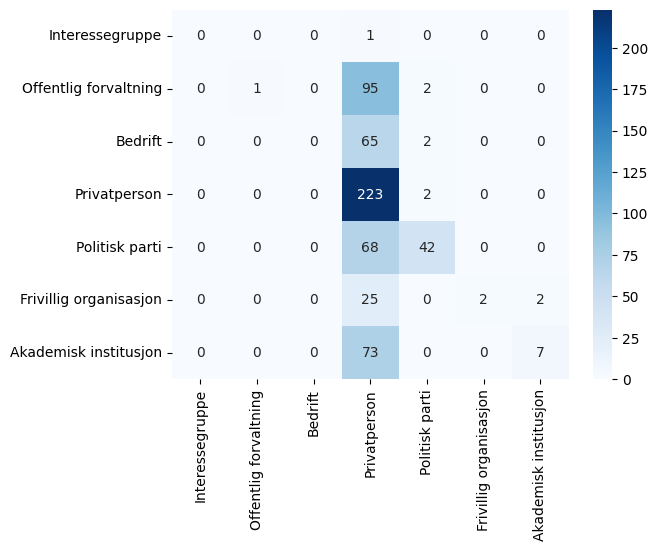

In [17]:
y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

labels = labels()
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

### Countvectorizer

0.26553077129803815


<Axes: >

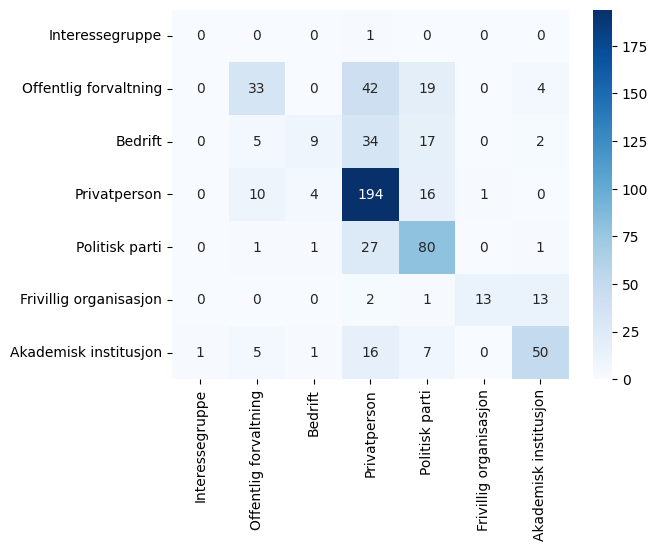

In [18]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))

# Convert ids to labels
y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

## Binary classifier MNB

## MNB binary classifier with count vectorizer

In [19]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

[0 1 1 ... 1 1 3]


In [20]:
# Try with a binary classifier
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.8975409836065574


<Axes: >

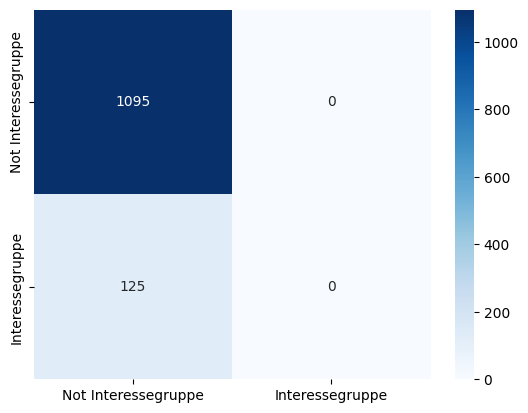

In [22]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interessegruppe', 'Interessegruppe'], yticklabels=['Not Interessegruppe', 'Interessegruppe'])


### Binary classifer with CountVectorizer


In [23]:
# Try with a binary classifier
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 3, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [24]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.8074657350174684


<Axes: >

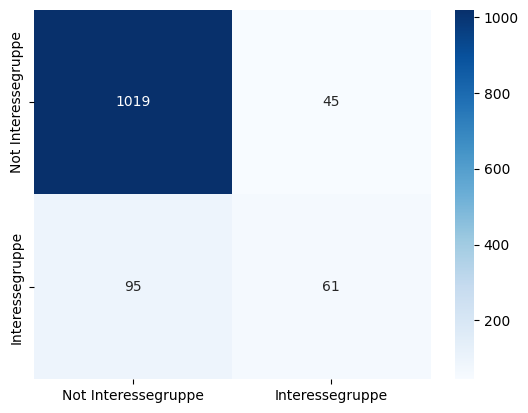

In [25]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interessegruppe', 'Interessegruppe'], yticklabels=['Not Interessegruppe', 'Interessegruppe'])